In [1]:
# Baseline model with increasing dropout on the cifar dataset

# source: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


# érdemes előre telepíteni, és utána újraindítani
!pip3 install hyperas
!pip3 install hyperopt


import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD





In [2]:
# Load train and test dataset
def load_dataset():
  # Load dataset
  (trainX, trainY),(testX, testY) = cifar10.load_data()
  # One hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  # Convert from integers to floats
  trainX = trainX.astype('float32')
  testX = testX.astype('float32')
  # normalize to range 0-1
  trainX = trainX / 255.0
  testX = testX / 255.0

  train_x = trainX
  train_y = trainY
  test_x = testX
  test_y = testY

  # return trainX, trainY, testX, testY
  return train_x, train_y, test_x, test_y



In [3]:
def create_model(train_x, train_y, test_x, test_y):
  from keras.layers import Layer
  from keras import backend as K
  import numpy as np

  n_filters1 = {{choice([16, 32, 64, 128, 256])}}
  n_filters2 = {{choice([16, 32, 64, 128, 256])}}
  # n_filters1 = {{choice([32])}}
  # n_filters2 = {{choice([32])}}
  n_kernel1 = {{choice([3, 5, 7])}}
  n_kernel2 = {{choice([3, 5, 7])}}
  dropout_1 = {{uniform(0, 0.5)}}
  dropout_2 = {{uniform(0, 0.5)}}
  n_batch = {{choice([64, 128, 256])}}
  optim = {{choice(['rmsprop', 'adam', 'sgd'])}}
  

  model = Sequential()
  model.add(Conv2D(
      filters = n_filters1, 
      kernel_size = n_kernel1, 
      activation = 'relu', 
      padding='same', 
      input_shape = (32, 32, 3)))
  model.add(Dropout(rate = dropout_1))
  model.add(Conv2D(filters = n_filters2, 
                   kernel_size = n_kernel2,
                   activation = 'relu', 
                   padding='same'))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding='same'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(rate = dropout_2))
  model.add(Flatten())
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dropout(rate = 0.5))
  model.add(Dense(units = 10, activation = 'softmax'))
  # compile model
  model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Done :) Happy :)

  batch_size = 32
  num_classes = 10
  epochs = 10
  # while True:pass
  result = model.fit(train_x, train_y,
                     batch_size = n_batch,
                     epochs = epochs,
                     verbose = 2,
                     validation_data = (test_x, test_y),
                     shuffle = True)
  
  # Az epoch_ok közül a legnagyob val_acc elmentése
  best_val_acc = np.amax(result.history['val_accuracy'])
  print('A legjobb val_acc:', best_val_acc)

  # Log kiírása: háló struktúra, és az eredmény
  with open('hyperas-fashionmnist-log.csv', 'a') as csv_file:
      csv_file.write(str(n_filters1) + ';')
      csv_file.write(str(n_filters2) + ';')
      csv_file.write(str(n_kernel1) + ';')
      csv_file.write(str(n_kernel2) + ';')
      csv_file.write(str(dropout_1) + ';')
      csv_file.write(str(dropout_2) + ';')
      csv_file.write(str(n_batch) + ';')
      csv_file.write(str(optim) + ';')
      csv_file.write(str(best_val_acc) + '\n')

  # Negatív val_acc, mert a hyperopt csomag mindig minimalizál
  return {'loss': -best_val_acc, 'status': STATUS_OK, 'model': model}

  

In [ ]:
# Log fájl inicializálás / fejléc
with open('hyperas-fashionmnist-log.csv', 'w') as csv_file:
  csv_file.write('n_filters1' + ';')
  csv_file.write('n_filters2' + ';')
  csv_file.write('n_kernel1' + ';')
  csv_file.write('n_kernel2' + ';')
  csv_file.write('dropout_1' + ';')
  csv_file.write('dropout_2' + ';')
  csv_file.write('n_batch' + ';')
  csv_file.write('optim' + ';')
  csv_file.write('best_val_acc' + '\n')

# Ezután colab-ról le kell tölteni a notebook-ot és a .ipynb fájlt utána 
# visszatölteni az aktuális könyvtárba

# A hyperas-hoz kapcsolódó importok
import hyperas
from hyperopt import  Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

# A teljes hiperparaméter optimalizálás indítása

best_run, best_model = optim.minimize(model = create_model,
                                      data = load_dataset,
                                      algo = tpe.suggest,
                                      max_evals = 100,
                                      notebook_name = 'Hyperas_main-23',
                                      trials = Trials())

>>> Imports:
#coding=utf-8

try:
    import sys
except:
    pass

try:
    from matplotlib import pyplot
except:
    pass

try:
    from keras.datasets import cifar10
except:
    pass

try:
    from keras.utils import to_categorical
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
except:
    pass

try:
    from keras.optimizers import SGD
except:
    pass

try:
    from keras.layers import Layer
except:
    pass

try:
    from keras import backend as K
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import hyperas
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    import pandas
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from mpl_toolk

In [1]:
# Printing best models
import pandas
df = pandas.read_csv('hyperas-fashionmnist-log.csv', delimiter=';')
df.sort_values(by=['best_val_acc'], ascending=False)

,n_filters1,n_filters2,n_kernel1,n_kernel2,dropout_1,dropout_2,n_batch,optim,best_val_acc
36,64,256,3,5,0.002192,0.474897,128,rmsprop,0.7436
32,64,256,3,5,0.003106,0.462759,128,adam,0.7347
11,128,128,3,3,0.108864,0.159497,128,adam,0.7205
33,64,256,3,5,0.007679,0.451397,256,adam,0.7199
19,32,256,3,7,0.309126,0.205718,128,adam,0.7181
...,...,...,...,...,...,...,...,...,...
5,16,128,7,7,0.095205,0.040319,128,sgd,0.5272
29,64,16,3,7,0.057225,0.223569,128,sgd,0.5223
51,16,256,7,5,0.276561,0.317794,128,sgd,0.5166
23,32,128,3,3,0.263673,0.000441,128,sgd,0.5133


In [2]:
# Print the best 10 models
hyperas_log = pandas.read_csv('hyperas-fashionmnist-log.csv', delimiter=';')
hyperas_best10 = hyperas_log.sort_values(by=['best_val_acc'], ascending=False).head(n=10)
hyperas_best10

,n_filters1,n_filters2,n_kernel1,n_kernel2,dropout_1,dropout_2,n_batch,optim,best_val_acc
36,64,256,3,5,0.002192,0.474897,128,rmsprop,0.7436
32,64,256,3,5,0.003106,0.462759,128,adam,0.7347
11,128,128,3,3,0.108864,0.159497,128,adam,0.7205
33,64,256,3,5,0.007679,0.451397,256,adam,0.7199
19,32,256,3,7,0.309126,0.205718,128,adam,0.7181
25,128,256,3,7,0.132930,0.247660,128,adam,0.7178
53,64,256,3,5,0.185727,0.499571,128,adam,0.7162
35,64,64,3,5,0.125146,0.293837,64,adam,0.7145
39,64,256,3,5,0.016652,0.435785,64,rmsprop,0.7138
49,64,256,3,5,0.405453,0.362400,256,rmsprop,0.7129


In [3]:
# Print the worst 10 models
hyperas_worst10 = hyperas_log.sort_values(by=['best_val_acc'], ascending=False).tail(n=10)
hyperas_worst10

,n_filters1,n_filters2,n_kernel1,n_kernel2,dropout_1,dropout_2,n_batch,optim,best_val_acc
44,16,256,7,5,0.108806,0.385831,128,sgd,0.5420
56,16,256,7,7,0.026960,0.274426,128,sgd,0.5360
34,64,128,3,5,0.044997,0.463612,128,sgd,0.5331
0,32,128,3,5,0.056230,0.160376,128,sgd,0.5328
7,16,64,5,5,0.105498,0.146636,128,sgd,0.5316
5,16,128,7,7,0.095205,0.040319,128,sgd,0.5272
29,64,16,3,7,0.057225,0.223569,128,sgd,0.5223
51,16,256,7,5,0.276561,0.317794,128,sgd,0.5166
23,32,128,3,3,0.263673,0.000441,128,sgd,0.5133
61,64,64,3,5,0.363207,0.453031,128,sgd,0.5052


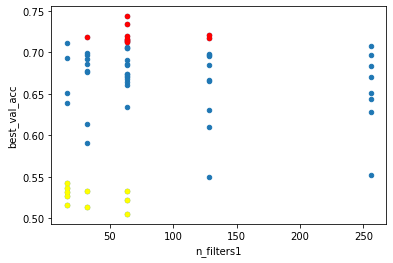

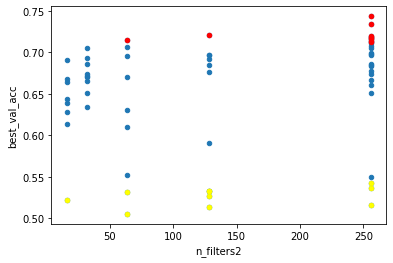

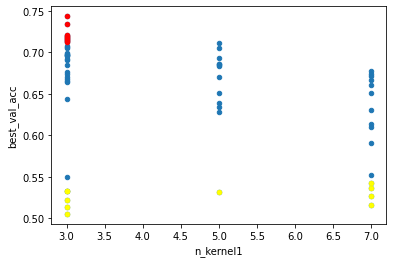

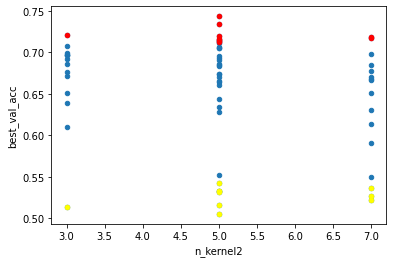

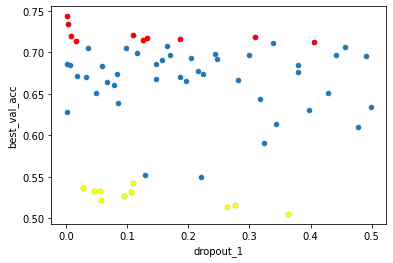

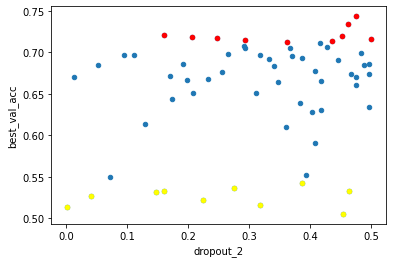

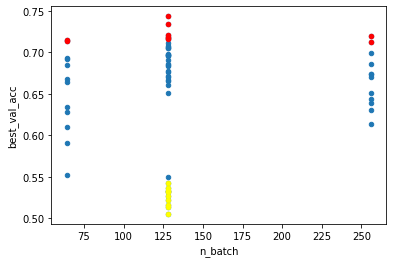

In [4]:
import matplotlib.pyplot as plt
for hyperparam in [ 'n_filters1', 'n_filters2', 'n_kernel1', 'n_kernel2', 'dropout_1', 'dropout_2', 'n_batch']:
  ax1 = hyperas_log.plot(kind='scatter', x=hyperparam, y='best_val_acc')
  hyperas_best10.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='red', ax=ax1)
  hyperas_worst10.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='yellow', ax=ax1)

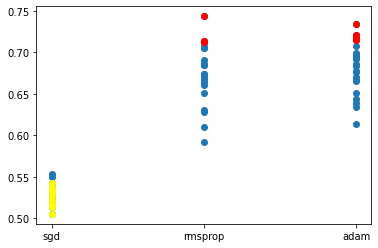

In [5]:
plt.scatter(hyperas_log.optim, hyperas_log.best_val_acc)
plt.scatter(hyperas_best10.optim, hyperas_best10.best_val_acc, color='red')
plt.scatter(hyperas_worst10.optim, hyperas_worst10.best_val_acc, color='yellow')
plt.show()

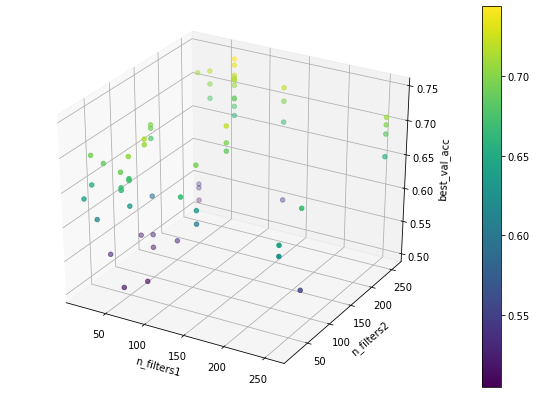

In [6]:
# How are the hyperparameters and the val_acc realated?
from mpl_toolkits.mplot3d import Axes3D
# Let's plot the relation of n_filters1 / n_filters2 and the best_val_acc
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter3D(hyperas_log.n_filters1, hyperas_log.n_filters2, hyperas_log.best_val_acc, c=hyperas_log.best_val_acc)
ax.set_xlabel('n_filters1')
ax.set_ylabel('n_filters2')
ax.set_zlabel('best_val_acc')
fig.colorbar(p)
plt.show()

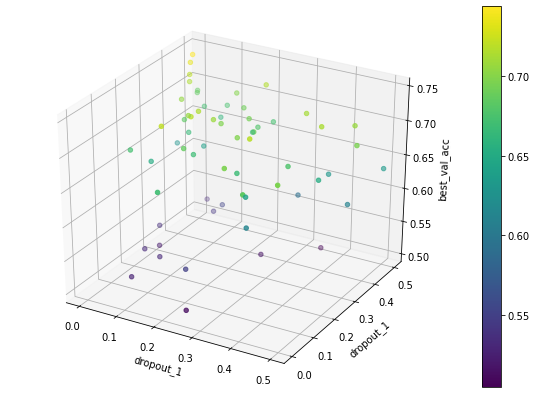

In [7]:
# Let's plot the relation of dropout_1 / dropout_2 and the best_val_acc
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter3D(hyperas_log.dropout_1, hyperas_log.dropout_2, hyperas_log.best_val_acc, c=hyperas_log.best_val_acc)
ax.set_xlabel('dropout_1')
ax.set_ylabel('dropout_1')
ax.set_zlabel('best_val_acc')
fig.colorbar(p)
plt.show()